# The One With The Data Analysis



<img src="images/friends_title.svg" alt="Title" width="700"/>



**Paper contents:**
- Introduction to the analysis
- Data sources
- Data wrangling
- Questions to answer
- Insights
- Possible further questions and improvements

# Introduction

The paper centers around the analysis the popular tv show *'F.R.I.E.N.D.S'* over its ten seasons between 1994 and 2004.

I was and still am a huge 'friends' fan throughout its ten year run. I have probably seen all ten season more than 15 times through return episodes.

The idea was to analyse all 236 episodes by acquiring their associated transcripts and, with the power of python, be able to transform these transcripts into an actionable data set.  

After some research, I was able to find complete transcripts provided at this [github repo](https://github.com/shilpibhattacharyya/Friends_Analysis/tree/master/transcripts_friends) where every episode from every season was merged to form 10 text files representing each season respectively.

Once the necessary data transformation has been done, the application of data analysis though python and its associated libraries made way to insights and further questions and improvements.

# Data sources

## Transcripts

As mentioned earlier, the first step was to acquire all the [transcripts](https://github.com/shilpibhattacharyya/Friends_Analysis/tree/master/transcripts_friends) and import them into python for further manipulation and cleaning.

**Libraries used**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import pandas as pd
import seaborn as sns
import re

# Modules created for cleaning and manipulating data
from modules import friends_library as fr
from modules import apartment_list as apart
from modules import catch_phrase as phrase

An example of season 1's transcript

In [2]:
transcript_1 = pd.read_csv('transcripts/merged1.csv', sep='\t')

In [3]:
transcript_1.head(10)

,Written by: Marta Kauffman & David Crane
0,Transcribed by: guineapig
1,Additional transcribing by: Eric Aasen
2,(Note: The previously unseen parts of this epi...
3,"[Scene: Central Perk, Chandler, Joey, Phoebe, ..."
4,Monica: There's nothing to tell! He's just som...
5,"Joey: C'mon, you're going out with the guy! Th..."
6,"Chandler: All right Joey, be nice. So does he..."
7,"Phoebe: Wait, does he eat chalk?"
8,"(They all stare, bemused.)"
9,"Phoebe: Just, 'cause, I don't want her to go t..."


# Data wrangling


<img src="images/data_cleaning.gif" width="450"/>


Since I was dealing with large text files, cleaning the data presented a challenge. The amount of variability involved with text was high and manipulating it with confidence was not easy.

After spending some time studying the transcripts, I decided to create modules housing functions that will, step by step, enable me to clean and narrow down the data to what is relevant.

## Calling functions to create one merged dataframe

After creating the different modules, I was able to call the necessary ones in order to create a pipeline that cleans and combines all 10 seasons into one dataframe for further cleaning and/or analysis.

Some functions from the *friends_library* that retrieve basic data layout

In [ ]:
#Function to retreive files from folder and output all file names accordingly
def raw_name(i):
    return 'transcripts/merged' + str(i) + '.csv'

#Function to rename header to text
def rename_col(df):
    df.rename(columns=({df.columns[0]: 'text'}), inplace=True)

#Function to create a NaN column to fill with location of scene
def scene_col(df):
    import numpy as np
    df['scene'] = np.nan
    df['scene'] = df[(df.text).str.startswith('[Scene:')]

#Function to fill each cell with the value of the preceeding cell
def scene_fill(df):
    df['scene'] = df['scene'].ffill(axis = 0)

In [4]:
seasons_list= []

#There are only 10 files
for i in range(1,11):
    #file name
    s = fr.raw_name(i)
    
    #dataframe of each file
    d = pd.read_csv( s , sep='\t')
    
    #data cleaning
    fr.rename_col(d)
    fr.scene_col(d)
    fr.scene_fill(d)
    fr.location(d)
    fr.drop_scene(d)
    fr.character(d)
    fr.word_count(d)
    d['season'] = i
    #only keeps main 6 character lines
    d = fr.final_df(d)
    
    #appending seasons accordingly
    seasons_list.append(d)

### Concatenating dataframes to create one

In [5]:
df1 = fr.concat_df(seasons_list)

In [6]:
#reset index
df1.reset_index(drop=True, inplace=True)

### Amending scene locations for ease of data exploration

In [7]:
apart.amend_location(df1)

In [8]:
df1.head()

,text,location,character,word_count,season
0,Monica: There's nothing to tell! He's just som...,Central Perk,Monica,11,1
1,"Joey: C'mon, you're going out with the guy! Th...",Central Perk,Joey,14,1
2,"Chandler: All right Joey, be nice. So does he...",Central Perk,Chandler,17,1
3,"Phoebe: Wait, does he eat chalk?",Central Perk,Phoebe,5,1
4,"Phoebe: Just, 'cause, I don't want her to go t...",Central Perk,Phoebe,16,1


In [9]:
df1.tail()

,text,location,character,word_count,season
48317,"Chandler: Oh, it's gonna be okay.",Chandler and Joey's,Chandler,5,10
48318,Rachel: (crying) Do you guys have to go to the...,Chandler and Joey's,Rachel,19,10
48319,Monica: We got some time.,Chandler and Joey's,Monica,4,10
48320,"Rachel: Okay, should we get some coffee?",Chandler and Joey's,Rachel,6,10
48321,Chandler: Sure. Where?,Chandler and Joey's,Chandler,2,10


In [10]:
df1.describe()

,word_count,season
count,48322.000000,48322.000000
mean,11.951285,5.619531
std,12.215999,2.797343
min,0.000000,1.000000
25%,4.000000,3.000000
50%,8.000000,6.000000
75%,16.000000,8.000000
max,248.000000,10.000000


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48322 entries, 0 to 48321
Data columns (total 5 columns):
text          48322 non-null object
location      48322 non-null object
character     48322 non-null object
word_count    48322 non-null int64
season        48322 non-null int64
dtypes: int64(2), object(3)
memory usage: 1.8+ MB


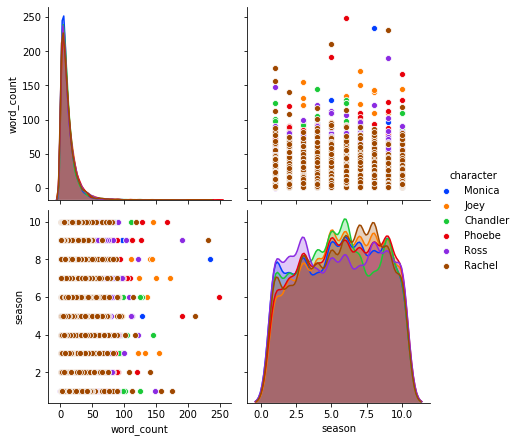

In [12]:
pairplot = sns.pairplot(df1, height=3, hue='character', palette="bright")

# Questions to answer

The questions that sparked this paper span a combination of questions from finding out who had the most lines to how many times Joey said 'Hey, how you doin!'.

Some of the questions presented:
* How many lines did each character directly contribute over 10 seasons
* How many words did each character directly contribute over 10 seasons
* Where did they spend most of their on screen time
* How many times Joey said 'Hey, how you doin!'
* How many times they say 'WE WERE ON A BREAK!'
* How many times anyone said 'OH MY GOD!'
* How many times 'dinosaur, palaeontology or palaeontologist' was said
* How many times 'Smelly Cat'
* How many times Joey mentions pizza

# Data structure

Reviewing the retrieved data, the final dataframe contains the following fields:

* **text:** The dialogue spoken
* **location:** The scene location split into top 5 recurring locations
* **character:** The character with the dialogue
* **word_count:** The total number of words spoken in each dialogue
* **season:** The associated season number
* **catch_phrase:** Famous catch phrases as per the questions stated earlier

# Insights


<img src="images/insights.jpg" width="500"/>


## Number of lines per character over 10 seasons

In [13]:
#Count of lines per character
lines_char = df1.groupby('character').agg({'text': 'count'}).nlargest(10, 'text')
lines_char['avg._lines_per_episode'] = round(lines_char.text/236,2)
lines_char

,text,avg._lines_per_episode
character,,
Ross,8723,36.96
Rachel,8709,36.90
Chandler,8036,34.05
Monica,7946,33.67
Joey,7863,33.32
Phoebe,7045,29.85



<img src="images/lines_per_character.png" alt="Title" width="1000"/>


We can clearly see that both Ross & Rachel have the highest number of individiual lines over the course of the 10 seasons with almost 9000 lines each and an average of approx 37 lines per episode.

Phoebe has the least amount of individual lines at around 7000 lines with an average of approx 30 lines per episode.


<img src="images/lines_per_season.png" alt="Title" width="1000"/>


Heatmap of lines per character/season


<img src="images/lines_per_season_2.png" alt="Title" width="1000"/>


Just from glancing at the heatmap of lines per character/season we can see that season 5-9 had the highest number of lines with some exceptions such as Chandler in season 8.

On the other hand we can tell that Phoebe is more or less a character with fewer lines accross all seasons.

# <center> Ross & Rachel are the two with the most lines

## Number of words per character over 10 seasons

Rather than just looking at the count of lines each character had, we take a closer look at the number of words spoken by each character.

In [14]:
words_char = df1.groupby('character').agg({'word_count': 'sum'}).nlargest(10, 'word_count')
words_char

,word_count
character,
Ross,105473
Rachel,104333
Joey,97635
Chandler,93975
Monica,88460
Phoebe,87634


We can see that the total word count by character is more or less well distirubted across the main 6 characters with Ross and Rachel again leading the pack with close to 100,000 words spoken from individual lines.


<img src="images/words_per_character.png" alt="Title" width="1000"/>


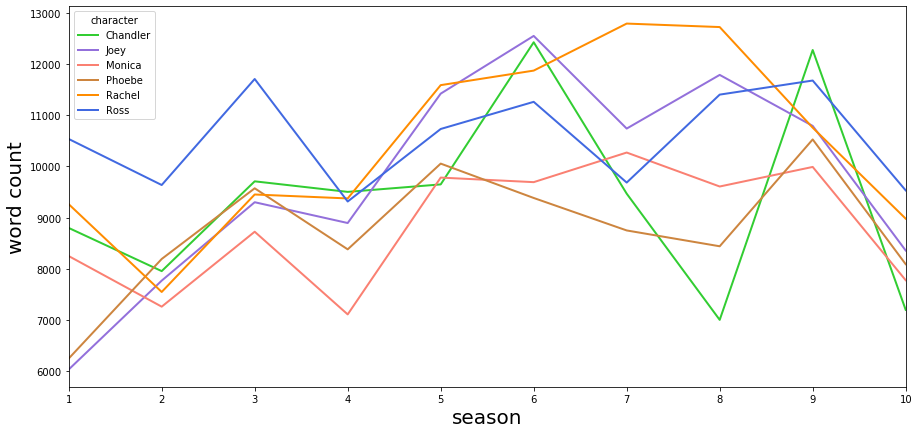

In [15]:
colors = ['limegreen', 'mediumpurple', 'salmon', 'peru', 'darkorange', 'royalblue']
df1.groupby(['season', 'character']).sum()['word_count'].unstack('character').plot(figsize=(15,7),color=colors, linewidth=2.0)
plt.xlabel('season',fontsize=20)
plt.ylabel('word count',fontsize=20)
linewidth=2.0
plt.show()

Rather than just looking at total word count, lets take a closer look into average number of words per line.

In [16]:
#Sum of words per character
words_char = df1.groupby('character').agg({'word_count': 'sum', 'text':'count'}).nlargest(10, 'word_count')
words_char.rename(columns={'text':'lines'}, inplace=True)

In [17]:
words_char['avg._words_per_line'] = round(words_char.word_count / words_char.lines,2)

In [18]:
words_char

,word_count,lines,avg._words_per_line
character,,,
Ross,105473,8723,12.09
Rachel,104333,8709,11.98
Joey,97635,7863,12.42
Chandler,93975,8036,11.69
Monica,88460,7946,11.13
Phoebe,87634,7045,12.44


According to the above table, Phoebe and Joey are the **two most talkative** characters with an average of 12.44 & 12.42 words per line respectively even though they came last with the least number of overall lines.

# Phoebe & Joey are the two most talkative characters

## Where did they spend most their time

So where did they spend most of their on screen time.

Locations have been narrowed down to the top six in terms of line count occurring at the respective location.
* Central Perk
* Chandler & Joey's
* Monica's 
* Ross's Apartment
* The Hallway
* Other

In [19]:
df_loc = pd.pivot_table(df1, values='text', index='season',columns=['location'], aggfunc=np.count_nonzero)
df_loc

location,Central Perk,Chandler and Joey's,Monica's Apartment,Other,Ross's Apartment,The Hallway
season,,,,,,
1,967,355,1897,984,92,86
2,661,933,1530,562,278,103
3,879,621,1891,1362,84,107
4,690,774,2009,740,79,116
5,953,778,1813,1243,371,91
6,1283,1511,1042,1258,209,115
7,980,1596,919,1321,178,58
8,830,2446,39,1331,308,192
9,868,1655,155,1903,627,79


### Location split overall


<img src="images/location_split_overall.jpeg" alt="Title" width="1000"/>


We can immediatley notice that Central Perk is NOT the location where the most scenes take place. In fact, it seems like Chandler & Joey's apartment leads the location split overall.

It is worth noting that Chandler & Joey's contains any scene that occurred in that apartment regardless if both characters were living there.

### Location split by season


<img src="images/location_split.jpeg" alt="Title" width="1000"/>


# Catch phrases!

## Calling all functions again to add 'Other' to the characters

In [20]:
seasons_list= []

#There are only 10 files
for i in range(1,11):
    #file name
    s = fr.raw_name(i)
    
    #dataframe of each file
    d = pd.read_csv( s , sep='\t')
    
    #data cleaning
    fr.rename_col(d)
    fr.scene_col(d)
    fr.scene_fill(d)
    fr.location(d)
    fr.drop_scene(d)
    fr.character(d)
    fr.word_count(d)
    d['season'] = i
    #this is excluded to keep 'Other' in the character column
    #d = fr.final_df(d)
    
    #appending seasons accordingly
    seasons_list.append(d)

In [21]:
df1 = fr.concat_df(seasons_list)

In [22]:
apart.amend_location(df1)

In [23]:
df1.head()

,text,location,character,word_count,season
3,"[Scene: Central Perk, Chandler, Joey, Phoebe, ...",Central Perk,Other,9,1
4,Monica: There's nothing to tell! He's just som...,Central Perk,Monica,11,1
5,"Joey: C'mon, you're going out with the guy! Th...",Central Perk,Joey,14,1
6,"Chandler: All right Joey, be nice. So does he...",Central Perk,Chandler,17,1
7,"Phoebe: Wait, does he eat chalk?",Central Perk,Phoebe,5,1


In order to identify catch phrases, I used a function that searches the text for specific strings.

In [ ]:
def catch_phrase(df):
    
    joey = ["How're you doing?", 
    "Hey, how you doin’?", 
    "How you doin’?",
    "How you doin'?",
    "how you doin'?",
    "Hey! How you doin’?",
    "How you doin?",
    "Hey, (in the Joey voice) how you doin’?",]

    ross_pattern = ['dinosaur',
    'dinosaurs',
    'palaeontology',
    'palaeontologist']

    break_pattern = ['on a break', 'ON a break', 'ON A BREAK']

    smelly_cat_pattern = ['smelly cat', 'SMELLY CAT', 'Smelly Cat', 'Smelly cat']

    phrase1 = '|'.join(joey)
    phrase2 = '|'.join(ross_pattern)
    phrase3 = '|'.join(break_pattern)
    phrase4 = '|'.join(smelly_cat_pattern)

    df['catch_phrase'] = ''
    df.loc[(df['text'].str.contains(phrase1)) & (df['character'] == 'Joey'), 'catch_phrase'] = 'How you doin!'
    df.loc[df['text'].str.contains(phrase2), 'catch_phrase'] = 'Dinosaurs!'
    df.loc[df['text'].str.contains(phrase3), 'catch_phrase'] = 'We were on a break!'
    df.loc[df['text'].str.contains(phrase4), 'catch_phrase'] = 'Smelly Cat!'
    #Pizza
    df.loc[(df.text.str.contains('pizza')) & (df['character'] == 'Joey'), 'catch_phrase'] = 'Pizza!'
    df.loc[(df['text'].str.lower().str.contains(phrase5)), 'catch_phrase'] = 'OH MY GOD!'


## Hey, How you doin!


<img src="images/how_you_doin.gif" width="500"/>




In [24]:
phrase.catch_phrase(df1)

/usr/local/lib/python3.7/site-packages/pandas/core/strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [25]:
df1.catch_phrase.value_counts()

                       66170
OH MY GOD!               975
Dinosaurs!                56
How you doin!             24
Smelly Cat!               24
Pizza!                    22
We were on a break!       17
Name: catch_phrase, dtype: int64

In [26]:
df1[df1['catch_phrase'] == 'How you doin!'].tail()

,text,location,character,word_count,season,catch_phrase
5511,"Joey: Hey, (in the Joey voice) how you doin’?",Other,Joey,8,8,How you doin!
5517,"Joey: Oh, I do. (Gives her the Joey-love look....",Other,Joey,11,8,How you doin!
3806,"Joey: Yeah, yeah. Hey, they totally match! The...",Chandler and Joey's,Joey,15,9,How you doin!
4341,"Joey: (interrupting their conversation) Ah, hi...",Other,Joey,69,9,How you doin!
6824,Joey: Yeah! How you doin'? Yeah alright!,Other,Joey,6,9,How you doin!


In [27]:
len(df1[df1['catch_phrase'] == 'How you doin!'])

24

# Surprise, the infamous catchphrase was only said a total of 24 times!!

## WE WERE ON A BREAK!


<img src="images/on_a_break.webp" width="500"/>


How many times has 'WE WERE ON A BREAK!' been mentioned?

In [28]:
df1[df1['catch_phrase'] == 'We were on a break!'].tail()

,text,location,character,word_count,season,catch_phrase
4486,Ben: ‘Cause you guys were on a break.,Chandler and Joey's,Other,7,7,We were on a break!
4715,Ben: That you and daddy were not on a break.,Other,Other,9,7,We were on a break!
2450,Phoebe: That’s it?! You call that a fight? Com...,Chandler and Joey's,Phoebe,22,8,We were on a break!
380,"Phoebe: I dunno, well he got over the ""We were...",Ross's Apartment,Phoebe,15,9,We were on a break!
6143,Ross: This is it. Unless we're on a break.,Ross's Apartment,Ross,8,10,We were on a break!


In [29]:
len(df1[df1['catch_phrase'] == 'We were on a break!'])

17

The One Where Ross and Rachel Take A Break was aired on February 13, 1997.


# Since then, the 'WE WERE ON A BREAK!' shenanigans have been mentioned a meager 18 times!

## Dinosaurs!

How many times have 'dinosaur, palaeontology or palaeontologist' benn mentioned.


<img src="images/dinosaurs.gif" width="500"/>


In [30]:
df1[df1['catch_phrase'] == 'Dinosaurs!'].tail()

,text,location,character,word_count,season,catch_phrase
4551,Chandler: A dinosaur died a million years ago?,Chandler and Joey's,Chandler,7,10,Dinosaurs!
4978,"Ross: Oh, nothing, it’s just, it’s close to Ro...",Other,Ross,18,10,Dinosaurs!
4985,Mr Zelner: That’s great. I worry about little ...,Other,Other,19,10,Dinosaurs!
5012,[Scene: Joey’s apartment. Rachel’s there and R...,Chandler and Joey's,Other,13,10,Dinosaurs!
5654,Joey: You can't just give up! Is that what a d...,Central Perk,Joey,12,10,Dinosaurs!


In [31]:
len(df1[df1['catch_phrase'] == 'Dinosaurs!'])

56

# 56 times! Dinosaurs and Palaeontology were the subject of conversation.

## OH MY GOD!


<img src="images/oh_my_god.gif" width="500"/>


How many times has anyone said 'OH MY GOD!'

In [32]:
df1[df1['catch_phrase'] == 'OH MY GOD!'].tail()

,text,location,character,word_count,season,catch_phrase
6034,Passenger #1: Oh my God. This plane doesn't ev...,Other,Other,11,10,OH MY GOD!
6083,Rachel: Oh my God... What.. What are you guys ...,Other,Rachel,10,10,OH MY GOD!
6091,Rachel: Oh my God.,Other,Rachel,3,10,OH MY GOD!
6123,Ross: Oh my God!,Ross's Apartment,Ross,3,10,OH MY GOD!
6134,Ross: No! No! Oh my God. Did she get off the p...,Ross's Apartment,Ross,17,10,OH MY GOD!


In [33]:
len(df1[df1['catch_phrase'] == 'OH MY GOD!'])

975

# 975 OH MY GODs

The End